<a href="https://colab.research.google.com/github/Sylvariane/Analyse-vente/blob/master/P04_01_scriptdonn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script de nettoyage des données

In [ ]:
# connexion à Google Drive pour importer les dossiers
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Téléchargements des modules et des fichiers

In [ ]:
# importation des modules nécessaires pour une première analyse et nettoyage des données
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Une fois les différents modules importés, on charge les fichiers bruts nécessaires à notre analyse. On dispose d'un jeu de données composé de trois fichiers : un fichier contenant les ventes, nommé transactions, mais qui sera renommé sells ; un fichier contenant les informations concernant les clients nommé customers puis renommé custom et un fichier contenant les informations les produits vendus se nommant products et qui sera renommé prod pour le reste de l'analyse.

In [ ]:
# importation des fichiers stockés sur Google Drive

sells = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sources/transactions.csv')
custom = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sources/customers.csv')
prod = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sources/products.csv')

Dans un premier temps, les fichiers seront nettoyés un par un puis ensuite, ils seront croisés. Dans une dernière partie, les fichiers crées seront enregistrés pour être analysé. 

## 2. Nettoyage des données du fichier des transactions

On commence par afficher les premières lignes du DataFrame pour voir sa composition. 

In [ ]:
print(sells.head())

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242


Le DataFrame des ventes contient quatre colonnes : l'identifiant des produits, la date de la transaction, le numéro de la session et l'identifiant du client acheteur.

### 2.1. Analyse des données manquantes

On affiche ensuite les données manquantes pouvant s'être introduite dans le fichier. Elles sont notées par le symbole NaN.

In [ ]:
# Dénombrement des valeurs manquantes
sells.isna().sum()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

Le fichier contenant les informations sur les transactions ne présentent pas de données manquantes. 

### 2.2. Analyse des données dupliquées

On crée une variable qui contient les données dupliquées. Ensuite, on affiche les données dupliquées du DataFrame. 

In [ ]:
# création d'une variable contenant les informations dupliquées
duplicated_sells = sells.duplicated()
sells[duplicated_sells]

,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


On observe la présence de 126 lignes correspondant à des sessions de tests. Il faudra donc les supprimer du fichier des transactions mais aussi des autres fichiers. Il faudra enlever le produit ayant un id_prod correspond à T_0 dans le fichier des produits et les clients dont le client_id correspond à ct_0 et ct_1. 

On supprime donc les valeurs dupliquées correspondant aux sessions test du 1er mars 2021.

In [ ]:
pd.set_option('mode.chained_assignment', None)
sells = sells.drop_duplicates()
sells[duplicated_sells]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id_prod,date,session_id,client_id


Les valeurs dupliquées sont donc supprimées mais il reste encore des données de session test avec l'identifiant s_0. On va donc supprimer ces valeurs pour pouvoir faire son analyse. 

In [ ]:
# affichage des données associées aux sessions de test
sells.loc[sells['session_id'] == 's_0']

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
264317,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1
288918,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
293107,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0
298399,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1


Pour supprimer toutes les données issues des tests, on supprime toutes les sessions dont l'identifiant session vaut 's_0'. On crée donc une liste contenant les index des lignes avec l'identifiant de session s_0 puis on supprime les lignes associées à l'aide de la méthode .drop().

In [ ]:
index_s_0 = sells[sells['session_id'] == 's_0'].index.values
sells.drop(index_s_0, 0, inplace=True)

In [ ]:
sells.loc[sells['session_id'] == 's_0']

,id_prod,date,session_id,client_id


### 2.3. Analyse des types

Une fois ces différents nettoyages effectués, on s'intéresse aux types de données contenus dans le fichier des transactions.

In [ ]:
print(sells.dtypes)

id_prod       object
date          object
session_id    object
client_id     object
dtype: object


On remarque que toutes les variables sont considérées comme des objets. On peut transformer la variable 'date' en type 'datetime'.

In [ ]:
sells['date'] = pd.to_datetime(sells['date'])
print(sells.dtypes)

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object


Une fois cette transformation faite, il est plus simple d'organiser les données par ordre chronologique. 

In [ ]:
sells = sells.sort_values('date')
sells = sells.set_index('date')
print(sells.head())

                           id_prod session_id client_id
date                                                   
2021-03-01 00:01:07.843138  0_1259        s_1     c_329
2021-03-01 00:02:26.047414  0_1390        s_2     c_664
2021-03-01 00:02:38.311413  0_1352        s_3     c_580
2021-03-01 00:04:54.559692  0_1458        s_4    c_7912
2021-03-01 00:05:18.801198  0_1358        s_5    c_2033


## 3. Nettoyage des données des produits

Comme pour le fichier des transactions, on affiche les premiers lignes du fichier des produits pour pouvoir se familiariser avec ce fichier et voir sa composition.

In [ ]:
print(prod.head())

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


Ce dataframe est composé de trois colonnes contenant les identifiants des produits, les prix des produits et la catégorie d'appartenance de chacun des produits.

### 3.1. Analyse des types dans le fichier des produits

On regarde le détail des types de données contenues dans le dataframe.

In [ ]:
prod.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

Il serait plus intéressant de modifier le type de la colonne 'categ' en une valeur catégorielle. 

In [ ]:
prod['categ'] = prod['categ'].astype('category')
prod.dtypes

id_prod      object
price       float64
categ      category
dtype: object

On peut ainsi classer les produits par ordre de catégorie. 

In [ ]:
prod = prod.sort_values('categ')
print(prod)

     id_prod   price categ
0     0_1421   19.99     0
1985   0_724   21.78     0
1986  0_1467    4.99     0
1988  0_1076   25.11     0
1989  0_2211    9.99     0
...      ...     ...   ...
719    2_223  175.99     2
1272     2_7   69.99     2
1729    2_84  182.30     2
1284   2_211  203.99     2
2977    2_77  145.99     2

[3287 rows x 3 columns]


### 3.2. Analyse des valeurs manquantes

Après la modification des types, on s'intéresse à la présence de données manquantes qui vont prendre la forme de NaN dans notre DataFrame. Pour identifier ces valeurs, on utiliser la fonction isna() associée à sum().

In [ ]:
# Dénombrement des valeurs manquantes
prod.isna().sum()

id_prod    False
price      False
categ      False
dtype: bool

Le DataFrame des produits ne contient aucune donnée manquante. 

### 3.3. Analyse des valeurs dupliquées

Ensuite, on s'intéresse au valeur dupliquée. On crée une variable qui va contenir les valeurs dupliquées dans notre table pour pouvoir les isoler et voir la forme de ces valeurs dupliquées.

In [ ]:
duplicated = prod.duplicated()
prod[duplicated]

,id_prod,price,categ


Le DataFrame prod ne présente pas de valeur dupliqué. On peut donc le laisser ainsi. 

### 3.4. Suppression du produit T_0

En effectuant le nettoyage du fichier des transactions, on a observé la présence d'un produit dont la valeur était T_0. Sachant que les données associées aux sessions test ont été supprimé dans le fichier des transactions, il peut être intéressant de supprimer ce produit T_0 pour ne pas fausser les analyses qui suivront. 

In [ ]:
t_0 = prod.loc[prod['id_prod'] == 'T_0']
print(t_0)

    id_prod  price categ
731     T_0   -1.0     0


Maintenant que l'on a identifié ce produit T_0, on va pouvoir le supprimer du fichier en utilisant la méthode .drop.

In [ ]:
prod.drop(731, 0, inplace=True)

On vérifie que la donnée a été supprimé du fichier des produits. 

In [ ]:
t_0 = prod.loc[prod['id_prod'] == 'T_0']
print(t_0)

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


## 4. Nettoyage des données des clients

Concernant le fichier client, la méthode sera la même que pour les produits. On commence d'abord par afficher les premières lignes du DataFrame ainsi que les types pour voir la composition de celui-ci. 

In [ ]:
print(custom.head())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


Ce Dataframe est lui aussi composé de trois colonnes contenant les identifiants des clients, le sexe et l'année de naissance des clients. 

### 4.1. Analyse des types

On s'intéresse ensuite aux types des données présents dans le fichier client.

In [ ]:
print(custom.dtypes)

client_id    object
sex          object
birth         int64
dtype: object


La variable 'sex' apparaît comme un objet, il peut être plus intéressant de changer ce type en variable catégorielle. 

In [ ]:
custom['sex'] = custom['sex'].astype('category')
custom.dtypes

client_id      object
sex          category
birth           int64
dtype: object

### 4.2. Analyse des données manquantes

On cherche la présence de valeurs manquantes (NaN) dans le fichier client. 

In [ ]:
custom.isna().sum()

client_id    False
sex          False
birth        False
dtype: bool

Le fichier client ne présente pas de données manquantes.

### 4.3. Analyse des données dupliquées

On regarde la présence de données dupliquées et on les stocke dans une variable que l'on nomme duplicated_custom.

In [ ]:
duplicated_custom = custom.duplicated()
custom[duplicated_custom]

,client_id,sex,birth


Ce DataFrame ne contient pas de données dupliquées. 

### 4.4. Suppresion des clients ct_0 et ct_1

Lors du nettoyage du fichier des transactions, on avait vu apparaître des clients associés à des sessions de test. Ces clients possédaient les identifiants ct_0 et ct_1. On va donc supprimer ces deux clients pour ne pas fausser les analyses qui suivront.

In [ ]:
ct_0 = custom.loc[custom['client_id'] == 'ct_0']
ct_1 = custom.loc[custom['client_id'] == 'ct_1']
print(ct_0)
print(ct_1)

     client_id sex  birth
2735      ct_0   f   2001
     client_id sex  birth
8494      ct_1   m   2001


On supprime ces deux valeurs en utilisant la méthode .drop(). 

In [ ]:
custom.drop([2735, 8494], 0, inplace=True)
custom.sort_values('client_id')

,client_id,sex,birth
4299,c_1,m,1955
6894,c_10,m,1956
2137,c_100,m,1992
8472,c_1000,f,1966
3426,c_1001,m,1982
...,...,...,...
7004,c_995,m,1955
2788,c_996,f,1970
94,c_997,f,1994
2145,c_998,m,2001


## 5. Analyse et croisement avec les autres DataFrames

On cherche ensuite si des id_prod sont présents dans les ventes mais pas dans le fichier produit. Si c'est le cas, on supprime ce produit car il ne possède pas de prix. On fait de même avec les client_id. POur cela, on crée deux colonnes contenant des booléans permettant de vérifier la présence de ces anomalies.

In [ ]:
sells['id_prod_prod'] = sells['id_prod'].isin(prod['id_prod'])
sells['client_id_custom'] = sells['client_id'].isin(custom['client_id'])
print(sells.head())

                           id_prod session_id  ... id_prod_prod  client_id_custom
date                                           ...                               
2021-03-01 00:01:07.843138  0_1259        s_1  ...         True              True
2021-03-01 00:02:26.047414  0_1390        s_2  ...         True              True
2021-03-01 00:02:38.311413  0_1352        s_3  ...         True              True
2021-03-01 00:04:54.559692  0_1458        s_4  ...         True              True
2021-03-01 00:05:18.801198  0_1358        s_5  ...         True              True

[5 rows x 5 columns]


On affiche les produits pour lesquels la variable id_prod_prod vaut False. Cela signifie que ce code produit se trouve uniquement dans les ventes mais pas dans les produits. 

In [ ]:
id_prod_false = sells[sells['id_prod_prod'] == False]
id_prod_false = id_prod_false.groupby('id_prod').mean()
print(id_prod_false)

         id_prod_prod  client_id_custom
id_prod                                
0_2245          False              True


On remarque que cela concerne uniquement un produit avec l'identifiant '0_2245'.  

In [ ]:
prod_0_2245 = prod.loc[prod['id_prod'] == '0_2245']
print(prod_0_2245)

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


Après vérification dans le DataFrame des produits, il n'existe pas de produit avec cet identifiant. On peut donc essayer d'imputer la valeur de ce produit en lui donnant la moyenne des prix de sa catégorie. 

On répète les étapes précédentes pour repérer la présence de client existants dans les sessions de vente mais qui ne sont pas existants dans le fichier.

In [ ]:
id_client_false = sells[sells['client_id_custom'] == False]
id_client_false = id_client_false.groupby('client_id_custom').mean()
print(id_client_false)

Empty DataFrame
Columns: [id_prod_prod]
Index: []


Il n'y a pas de valeur 'False', on ne supprime pas de ligne pour cette condition. 

On calcule donc la moyenne des prix des produits de catégorie. 

In [ ]:
transactions = pd.merge(sells, prod, on=['id_prod']) 
transactions = pd.pivot_table(index='id_prod', columns='categ', values='price', aggfunc=np.mean, data=transactions)
moy_cat0 = transactions[0].mean(skipna=True)
print('Prix moyen dans la catégorie 0:', moy_cat0)

Prix moyen dans la catégorie 0: 11.718568310781567


On ajoute donc une nouvelle ligne au fichier des produits pour y ajouter le produit 0_2245 avec un prix de 11.71.  

In [ ]:
prod = prod.sort_index()
print(prod.tail())

     id_prod   price categ
3282    2_23  115.99     2
3283   0_146   17.14     0
3284   0_802   11.22     0
3285   1_140   38.56     1
3286  0_1920   25.16     0


In [ ]:
prod.loc[3287] = {'id_prod' : '0_2245', 'price' : 11.71, 'categ' : 0}
print(prod.tail())

     id_prod  price  categ
3283   0_146  17.14      0
3284   0_802  11.22      0
3285   1_140  38.56      1
3286  0_1920  25.16      0
3287  0_2245  11.71      0


Les ventes associées à ce produit ont bien été ajoutés à ce fichier. On va pouvoir l'importer de cette manière pour pouvoir faire l'analyse des ventes.

In [ ]:
sells = sells.drop(columns=['client_id_custom', 'id_prod_prod'])

L'analyse du top 10 montre 4 clients qui se détache largement des autres. Ces outliers pouvant entraîner des anomalies lors de l'analyse des corrélations, le choix a été fait de les supprimer lors du nettoyage des données. 

In [ ]:
df = pd.merge(sells, custom, on='client_id')
df = pd.merge(df, prod, on = 'id_prod')
df['count'] = 1
df = df.groupby('client_id').sum().reset_index()
df = df.sort_values('count', ascending=False)
df = df[['client_id', 'count']]
df = pd.merge(df, custom, on='client_id')
df = df.sort_values('count', ascending=False)
top_10 = df.iloc[0:10]
print(top_10)

   client_id  count sex  birth
0     c_1609  12855   m   1980
1     c_6714   4473   f   1968
2     c_3454   3275   m   1969
3     c_4958   2562   m   1999
4     c_2140    195   f   1977
5     c_7959    195   f   1974
6     c_8026    193   m   1978
7     c_2595    193   m   1974
8     c_3725    190   f   1980
10    c_8392    189   f   1978


In [ ]:
mask = sells.loc[(sells['client_id'] == 'c_1609') | (sells['client_id'] =='c_6714') | (sells['client_id'] =='c_3454') | (sells['client_id'] =='c_4958')]
outliers = mask.index.tolist()
sells = sells.drop(outliers)

Une fois les corrections faites, on enregistre le fichier pour l'étape de l'analyse. 

## 6. Enregistrements des fichiers nettoyés

Une fois le nettoyage des fichiers terminés, on les enregistre pour pouvoir avoir accès aux fichiers d'origine si on remarque un problème lors de l'analyse. Les fichiers source sont conservés dans un dossier 'source' qui se retrouven dans le chemin d'appel du début de ce script. 

In [ ]:
sells.to_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sells.csv')

In [ ]:
prod.to_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/prod.csv')

In [ ]:
custom.to_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/custom.csv')

## 7. Analyses complémentaires concernant le mois d'octobre

Après une analyse du chiffre d'affaire, on observe une anomalie pour le mois d'octobre. On va donc se pencher sur les ventes du mois d'octobre pour pouvoir expliquer cette anomalie. 

In [ ]:
sells = sells.reset_index()
sells_2 = pd.merge(sells, prod, on = ['id_prod'])
sells_2.head()

,date,id_prod,session_id,client_id,price,categ
0,2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0
1,2021-03-01 10:27:10.675023,0_1259,s_202,c_1599,11.99,0
2,2021-03-05 13:32:43.907997,0_1259,s_2114,c_107,11.99,0
3,2021-03-07 09:47:05.272864,0_1259,s_2976,c_4215,11.99,0
4,2021-03-09 21:26:58.585264,0_1259,s_4088,c_174,11.99,0


In [ ]:
sells_2['mois-année'] = pd.to_datetime(sells_2['date'])
sells_2['mois-année'] = sells_2['date'].apply(lambda x: x.strftime("%b %Y"))
sells_2.head()

,date,id_prod,session_id,client_id,price,categ,mois-année
0,2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0,Mar 2021
1,2021-03-01 10:27:10.675023,0_1259,s_202,c_1599,11.99,0,Mar 2021
2,2021-03-05 13:32:43.907997,0_1259,s_2114,c_107,11.99,0,Mar 2021
3,2021-03-07 09:47:05.272864,0_1259,s_2976,c_4215,11.99,0,Mar 2021
4,2021-03-09 21:26:58.585264,0_1259,s_4088,c_174,11.99,0,Mar 2021


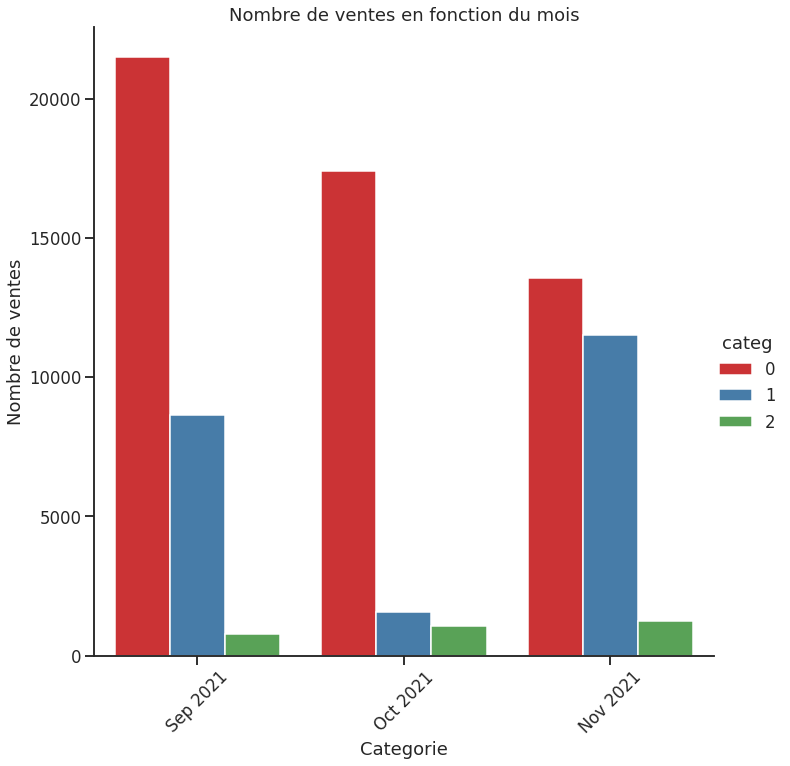

In [ ]:
sells_sept_oct_nov = sells_2[(sells_2['mois-année'] == 'Sep 2021') |(sells_2['mois-année'] == 'Oct 2021') | (sells_2['mois-année'] == 'Nov 2021')]

sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('mois-année', data=sells_sept_oct_nov, hue='categ', kind='count', height=10)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Categorie')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes en fonction du mois')

_ = plt.show()

In [ ]:
pd.set_option('mode.chained_assignment', None)
sells_oct = sells_2[sells_2['mois-année'] == 'Oct 2021']
sells_oct['date'] = sells_oct['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
sells_oct['date'] = pd.to_datetime(sells_oct['date'])
sells_oct = sells_oct.sort_values('date')
sells_oct['date'] = sells_oct['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
print(sells_oct)

                   date id_prod session_id client_id  price  categ mois-année
298733  Fri 01 Oct 2021   1_643    s_98649    c_1061  29.99      1   Oct 2021
293821  Fri 01 Oct 2021   1_202    s_98171    c_4492  19.96      1   Oct 2021
253867  Fri 01 Oct 2021  0_1555    s_98337    c_3287  15.99      0   Oct 2021
253868  Fri 01 Oct 2021  0_1555    s_98453    c_5051  15.99      0   Oct 2021
124064  Fri 01 Oct 2021   1_426    s_98302    c_5772  19.44      1   Oct 2021
...                 ...     ...        ...       ...    ...    ...        ...
89502   Sun 31 Oct 2021  0_1409   s_112754    c_7949   4.99      0   Oct 2021
303559  Sun 31 Oct 2021   0_438   s_112531    c_1876  14.01      0   Oct 2021
40273   Sun 31 Oct 2021   2_202   s_112869    c_7554  67.57      2   Oct 2021
206796  Sun 31 Oct 2021  0_2083   s_112851    c_1863   6.99      0   Oct 2021
258980  Sun 31 Oct 2021  0_1761   s_112630    c_5545   7.99      0   Oct 2021

[20043 rows x 7 columns]


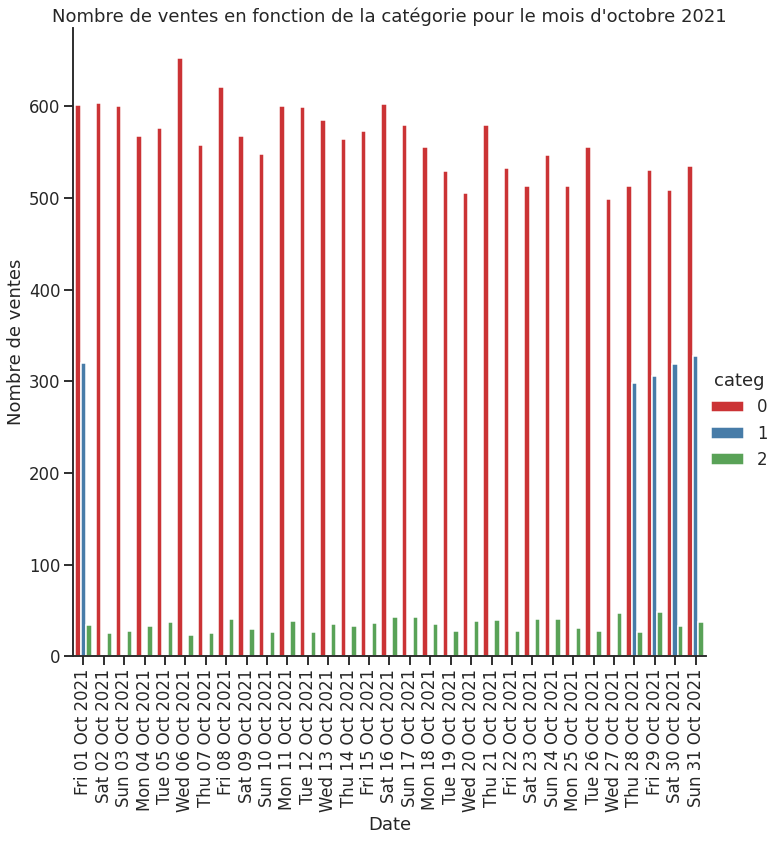

In [ ]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('date', data=sells_oct, hue='categ', kind='count', height=10)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Date')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes en fonction de la catégorie pour le mois d\'octobre 2021')

_ = plt.show()